<a href="https://colab.research.google.com/github/books-by-chansung/ds-bookcamp/blob/main/notebooks/ds_bookcamp_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p /usr/share/fonts/truetype/nanum
!wget https://raw.githubusercontent.com/books-by-chansung/ds-bookcamp/main/headlines.txt -O headlines.txt
!wget https://github.com/books-by-chansung/ds-bookcamp/blob/main/NanumBarunGothic.ttf?raw=true -O /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf

--2024-08-18 14:41:52--  https://raw.githubusercontent.com/books-by-chansung/ds-bookcamp/main/headlines.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27159 (27K) [text/plain]
Saving to: ‘headlines.txt’

headlines.txt       100%[===================>]  26.52K  --.-KB/s    in 0.009s  

2024-08-18 14:41:53 (2.95 MB/s) - ‘headlines.txt’ saved [27159/27159]

--2024-08-18 14:41:53--  https://github.com/books-by-chansung/ds-bookcamp/blob/main/NanumBarunGothic.ttf?raw=true
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/books-by-chansung/ds-bookcamp/raw/main/NanumBarunGothic.ttf [following]
--2024-08-18 14:41:5

In [2]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

In [3]:
!pip install Unidecode
!pip install geonamescache

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 1.8 MB/s eta 0:00:00


In [4]:
import math
import re
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from unidecode import unidecode
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


import cartopy
from cartopy.crs import LambertConformal
from cartopy.crs import PlateCarree

from geonamescache import GeonamesCache
gc = GeonamesCache()

## 12-1

In [5]:
headline_file = open('headlines.txt','r')
headlines = [line.strip()
            for line in headline_file.readlines()]
num_headlines = len(headlines)
print(f"{num_headlines}개의 헤드라인을 불러왔습니다")

650개의 헤드라인을 불러왔습니다


## 12-2

In [6]:
def name_to_regex(name):
    decoded_name = unidecode(name)
    if name != decoded_name:
        regex = fr'\b({name}|{decoded_name})\b'
    else:
        regex = fr'\b{name}\b'
    return re.compile(regex, flags=re.IGNORECASE)

## 12-3

In [7]:
countries = [country['name']
            for country in gc.get_countries().values()]
country_to_name = {name_to_regex(name): name
                   for name in countries}

cities = [city['name'] for city in gc.get_cities().values()]
city_to_name = {name_to_regex(name): name for name in cities}

## 12-4

In [8]:
def get_name_in_text(text, dictionary):
    for regex, name in sorted(dictionary.items(),
                              key=lambda x: x[1]):
        if regex.search(text):
            return name
    return None

## 12-5

In [9]:
matched_countries = [get_name_in_text(headline, country_to_name)
                    for headline in headlines]
matched_cities = [get_name_in_text(headline, city_to_name)
                 for headline in headlines]
data = {'Headline': headlines, 'City': matched_cities,
        'Country': matched_countries}
df = pd.DataFrame(data)

## 12-6

In [10]:
summary = df[['City', 'Country']].describe()
print(summary)

       City Country
count   618      15
unique  511      10
top      Of  Brazil
freq     44       3


## 12-7

In [11]:
of_cities = df[df.City == 'Of'][['City', 'Headline']]
ten_of_cities = of_cities.head(10)
print(ten_of_cities.to_string(index=False))

City                                                                Headline
  Of                                   Case of Measles Reported in Vancouver
  Of Authorities are Worried about the Spread of Bronchitis in Silver Spring
  Of     Authorities are Worried about the Spread of Mad Cow Disease in Rome
  Of                    Rochester authorities confirmed the spread of Dengue
  Of                          Tokyo Encounters Severe Symptoms of Meningitis
  Of       Authorities are Worried about the Spread of Influenza in Savannah
  Of                                 Spike of Pneumonia Cases in Springfield
  Of                     The Spread of Measles in Spokane has been Confirmed
  Of                                         Outbreak of Zika in Panama City
  Of                         Urbana Encounters Severe Symptoms of Meningitis


## 12-8

In [12]:
def get_cities_in_headline(headline):
    cities_in_headline = set()
    for regex, name in city_to_name.items():
        match = regex.search(headline)
        if match:
            if headline[match.start()].isupper():
                cities_in_headline.add(name)

    return list(cities_in_headline)

df['Cities'] = df['Headline'].apply(get_cities_in_headline)
df['Num_cities'] = df['Cities'].apply(len)
df_multiple_cities = df[df.Num_cities > 1]
num_rows, _ = df_multiple_cities.shape
print(f"{num_rows}개의 헤드라인에서 여러 도시가 등장했습니다")

72개의 헤드라인에서 여러 도시가 등장했습니다


## 12-9

In [13]:
ten_cities = df_multiple_cities[['Cities', 'Headline']].head(10)
print(ten_cities.to_string(index=False))

                       Cities                                                   Headline
        [York, New York City]                            Could Zika Reach New York City?
         [Miami, Miami Beach]                          First Case of Zika in Miami Beach
              [San Juan, San] San Juan reports 1st U.S. Zika-related death amid outbreak
   [Los Angeles, Los Ángeles]                       New Los Angeles Hairstyle goes Viral
                 [Bay, Tampa]                      Tampa Bay Area Zika Case Count Climbs
       [Ho Chi Minh City, Ho]             Zika cases in Vietnam's Ho Chi Minh City surge
             [San Diego, San]                   Key Zika Findings in San Diego Institute
          [Hīt, Kuala Lumpur]                         Kuala Lumpur is Hit By Zika Threat
         [San Francisco, San]                           Zika Virus Reaches San Francisco
[Salvador, San Salvador, San]                               Zika worries in San Salvador


## 12-10

In [14]:
def get_longest_city(cities):
    if cities:
        return max(cities, key=len)
    return None

df['City'] = df['Cities'].apply(get_longest_city)

## 12-11

In [15]:
short_cities = df[df.City.str.len() <= 4][['City', 'Headline']]
print(short_cities.to_string(index=False))

City                                                            Headline
Lima                                 Lima tries to address Zika Concerns
Pune                                      Pune woman diagnosed with Zika
Rome Authorities are Worried about the Spread of Mad Cow Disease in Rome
Molo                                 Molo Cholera Spread Causing Concern
Miri                                                Zika arrives in Miri
Nadi                More people in Nadi are infected with HIV every year
Baud       Rumors about Tuberculosis Spreading in Baud have been Refuted
Kobe                                      Chikungunya re-emerges in Kobe
Waco                                 More Zika patients reported in Waco
Erie                                         Erie County sets Zika traps
Kent                                        Kent is infested with Rabies
Reno                  The Spread of Gonorrhea in Reno has been Confirmed
Sibu                                       Zika sym

## 12-12

In [16]:
df_countries = df[df.Country.notnull()][['City',
                                    'Country',
                                    'Headline']]
print(df_countries.to_string(index=False))

            City   Country                                                              Headline
          Recife    Brazil                               Mystery Virus Spreads in Recife, Brazil
Ho Chi Minh City   Vietnam                        Zika cases in Vietnam's Ho Chi Minh City surge
         Bangkok  Thailand                                        Thailand-Zika Virus in Bangkok
      Piracicaba    Brazil                                   Zika outbreak in Piracicaba, Brazil
           Klang  Malaysia                                      Zika surfaces in Klang, Malaysia
  Guatemala City Guatemala Rumors about Meningitis spreading in Guatemala City have been refuted
     Belize City    Belize                                    Belize City under threat from Zika
        Campinas    Brazil                                      Student sick in Campinas, Brazil
     Mexico City    Mexico                                  Zika outbreak spreads to Mexico City
   Kota Kinabalu  Malaysia    

## 12-13

In [17]:
df.drop('Country', axis=1, inplace=True)

## 12-14

In [18]:
df_unmatched = df[df.City.isnull()]
num_unmatched = len(df_unmatched)
print(f"도시와 일치하지 않는 {num_unmatched} 개의 헤드라인이 존재합니다.")
print(df_unmatched.head(10)[['Headline']].values)

도시와 일치하지 않는 39 개의 헤드라인이 존재합니다.
[['Louisiana Zika cases up to 26']
 ['Zika infects pregnant woman in Cebu']
 ['Spanish Flu Sighted in Antigua']
 ['Zika case reported in Oton']
 ['Maka City Experiences Influenza Outbreak']
 ['West Nile Virus Outbreak in Saint Johns']
 ['Syphilis Hits Jefferson']
 ['Malaria Exposure in Sussex']
 ['Greenwich Establishes Zika Task Force']
 ['Will West Nile Virus vaccine help Parsons?']]


## 12-15

In [19]:
df = df[~df.City.isnull()][['City', 'Headline']]

## 12-16

In [20]:
latitudes, longitudes = [], []
for city_name in df.City.values:

    city = max(gc.get_cities_by_name(city_name),
             key=lambda x: list(x.values())[0]['population'])
    city = list(city.values())[0]
    latitudes.append(city['latitude'])
    longitudes.append(city['longitude'])

df = df.assign(Latitude=latitudes, Longitude=longitudes)

## 12-17

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

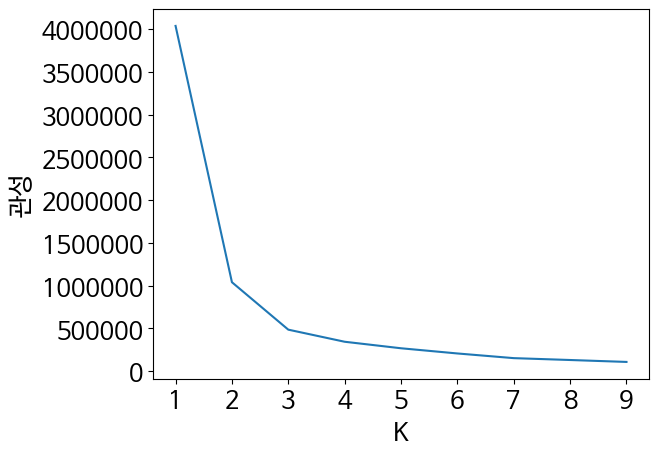

In [21]:
from matplotlib.ticker import ScalarFormatter

coordinates = df[['Latitude', 'Longitude']].values
k_values = range(1, 10)
inertia_values = []
for k in k_values:
    inertia_values.append(KMeans(k).fit(coordinates).inertia_)

plt.plot(range(1, 10), inertia_values)
plt.xticks(range(1, 10))
plt.yticks(range(0, 4500000, 500000))
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('K')
plt.ylabel('관성')
plt.show()

## 12-18

In [22]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 78.2 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


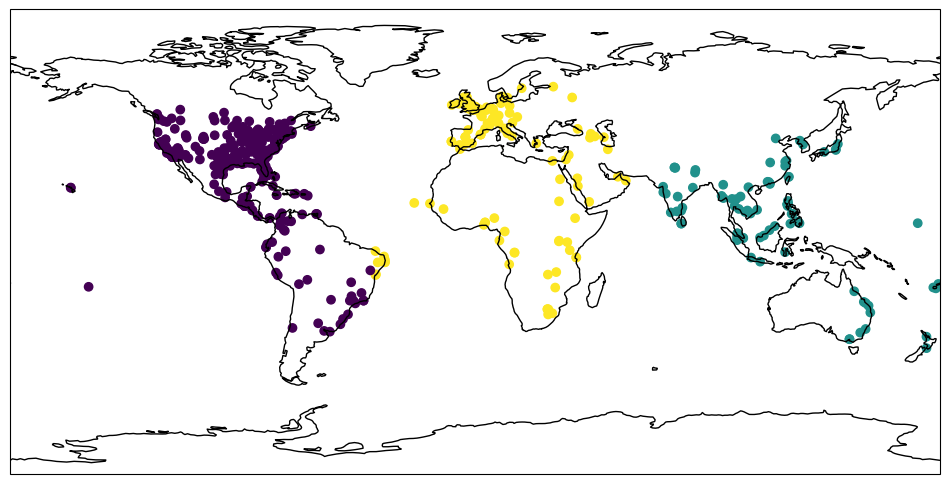

In [23]:
def plot_clusters(clusters, longitudes, latitudes):
    plt.figure(figsize=(12, 10))
    ax = plt.axes(projection=PlateCarree())
    ax.coastlines()
    ax.scatter(longitudes, latitudes, c=clusters)
    ax.set_global()
    plt.show()

df['Cluster'] = KMeans(3).fit_predict(coordinates)
plot_clusters(df.Cluster, df.Longitude, df.Latitude)

## 12-19

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


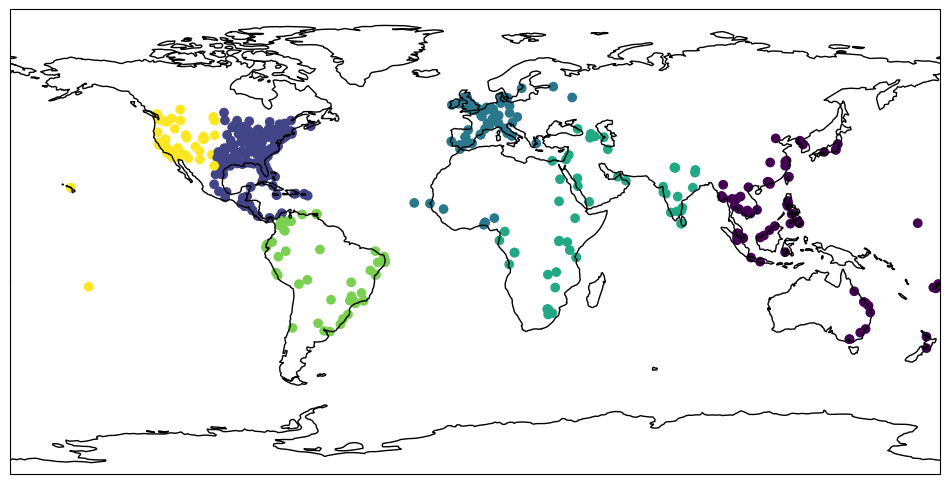

In [24]:
df['Cluster'] = KMeans(6).fit_predict(coordinates)
plot_clusters(df.Cluster, df.Longitude, df.Latitude)

## 12-20

In [25]:
from math import sin, cos, asin

def great_circle_distance(coord1, coord2, radius=3956):
    if np.array_equal(coord1, coord2):
        return 0.0
    coord1, coord2 = np.radians(coord1), np.radians(coord2)
    delta_x, delta_y = coord2 - coord1
    haversin = sin(delta_x / 2) ** 2 + np.product([cos(coord1[0]),
                                              cos(coord2[0]),
                                              sin(delta_y / 2) ** 2])
    return 2 * radius * asin(haversin ** 0.5)

## 12-21

In [26]:
from sklearn.cluster import DBSCAN

metric = great_circle_distance
dbscan = DBSCAN(eps=250, min_samples=3, metric=metric)
df['Cluster'] = dbscan.fit_predict(coordinates)

## 12-22

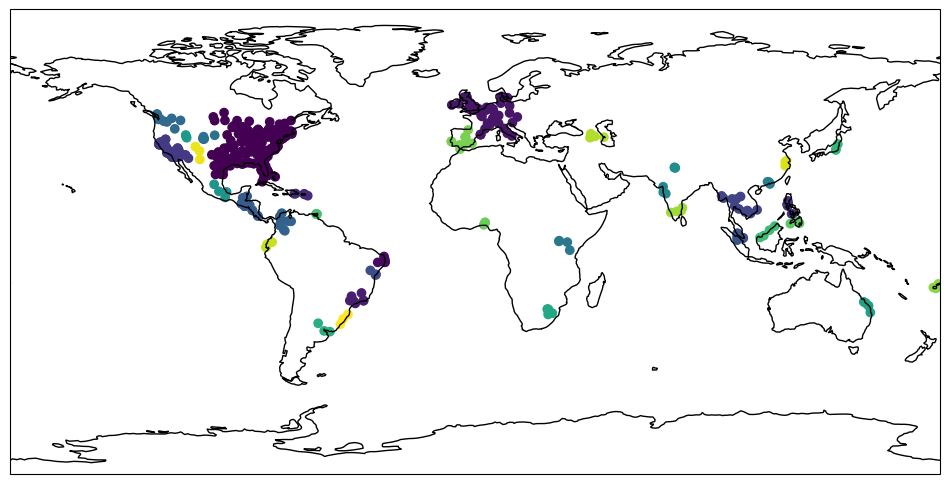

In [27]:
df_no_outliers = df[df.Cluster > -1]
plot_clusters(df_no_outliers.Cluster, df_no_outliers.Longitude, df_no_outliers.Latitude)

## 12-23

In [28]:
def get_country_code(city_name):
    city = max(gc.get_cities_by_name(city_name),
               key=lambda x: list(x.values())[0]['population'])
    return list(city.values())[0]['countrycode']

df['Country_code'] = df.City.apply(get_country_code)

## 12-24

In [29]:
df_us = df[df.Country_code == 'US']
df_not_us = df[df.Country_code != 'US']

## 12-25

In [30]:
def re_cluster(input_df, eps):
    input_coord = input_df[['Latitude', 'Longitude']].values
    dbscan = DBSCAN(eps=eps, min_samples=3,
                      metric=great_circle_distance)
    clusters = dbscan.fit_predict(input_coord)
    input_df = input_df.assign(Cluster=clusters)
    return input_df[input_df.Cluster > -1]

df_not_us = re_cluster(df_not_us, 250)
df_us = re_cluster(df_us, 125)

## 12-26

In [31]:
groups = df_not_us.groupby('Cluster')
num_groups = len(groups)
print(f"미국 이외 지역에서 {num_groups}개의 클러스터가 감지되었습니다")

32 Non-US clusters have been detected


## 12-27

In [32]:
sorted_groups = sorted(groups, key=lambda x: len(x[1]),
                      reverse=True)
group_id, largest_group = sorted_groups[0]
group_size = len(largest_group)
print(f"가장 큰 클러스터는 {group_size}개의 헤드라인을 포함합니다")

가장 큰 클러스터는 51개의 헤드라인을 포함합니다


## 12-28

In [33]:
def compute_centrality(group):
    group_coords = group[['Latitude', 'Longitude']].values
    center = group_coords.mean(axis=0)
    distance_to_center = [great_circle_distance(center, coord)
                        for coord in group_coords]
    group['Distance_to_center'] = distance_to_center

## 12-29

In [34]:
def sort_by_centrality(group):
    compute_centrality(group)
    return group.sort_values(by=['Distance_to_center'], ascending=True)

largest_group = sort_by_centrality(largest_group)
for headline in largest_group.Headline.values[:5]:
    print(headline)

Mad Cow Disease Disastrous to Brussels
Scientists in Paris to look for answers
More Livestock in Fontainebleau are infected with Mad Cow Disease
Mad Cow Disease Hits Rotterdam
Contaminated Meat Brings Trouble for Bonn Farmers


<ipython-input-33-de2643ed20cd>:4: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  distance_to_center = [great_circle_distance(center, coord)


## 12-30

In [35]:
from collections import Counter
def top_countries(group):
    countries = [gc.get_countries()[country_code]['name']
               for country_code in group.Country_code.values]
    return Counter(countries).most_common(3)

print(top_countries(largest_group))

[('United Kingdom', 19), ('France', 7), ('Germany', 6)]


## 12-31

In [36]:
for _, group in sorted_groups[1:5]:
    sorted_group = sort_by_centrality(group)
    print(top_countries(sorted_group))
    for headline in sorted_group.Headline.values[:5]:
        print(headline)
    print('\n')

[('Philippines', 15)]
Zika afflicts patient in Calamba
Hepatitis E re-emerges in Santa Rosa
Batangas Tourism Takes a Hit as Virus Spreads
More Zika patients reported in Indang
Spreading Zika reaches Bacoor


[('Thailand', 5), ('Cambodia', 3), ('Vietnam', 2)]
More Zika patients reported in Chanthaburi
Thailand-Zika Virus in Bangkok
Zika case reported in Phetchabun
Zika arrives in Udon Thani
More Zika patients reported in Kampong Speu


[('El Salvador', 3), ('Nicaragua', 2), ('Guatemala', 2)]
Zika arrives in Tegucigalpa
Zika Reported in Ilopango
More Zika cases in Soyapango
Zika worries in San Salvador
Spike of Rabies Cases in Managua


[('Spain', 8), ('Portugal', 2), ('Morocco', 1)]
Spanish flu spreading in Madrid
Rabies Hits Madrid
Spanish Flu Spreading through Madrid
Spanish Flu Spreading through Madrid
Zika Troubles come to Jaen




<ipython-input-33-de2643ed20cd>:4: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  distance_to_center = [great_circle_distance(center, coord)
<ipython-input-33-de2643ed20cd>:4: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  distance_to_center = [great_circle_distance(center, coord)
<ipython-input-33-de2643ed20cd>:4: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  distance_to_center = [great_circle_distance(center, coord)
<ipython-input-33-de2643ed20cd>:4: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  distance_to_center = [great_circle_distance(center, coord)


## 12-32

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


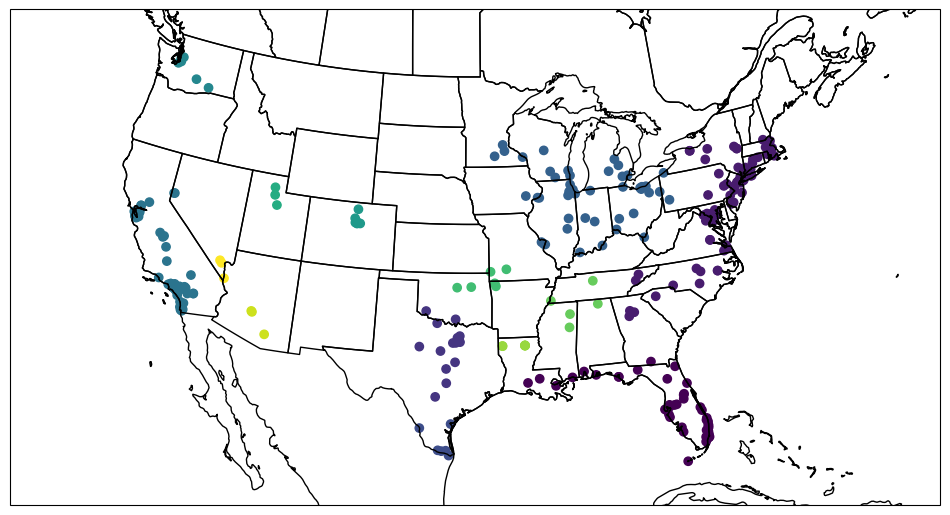

In [39]:
us_extent = [-125, -66.5, 20, 50]

plt.figure(figsize=(12, 10))
ax = plt.axes(projection=LambertConformal())
ax.set_extent(us_extent)
ax.scatter(df_us.Longitude, df_us.Latitude, c=df_us.Cluster,
            transform=PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.STATES)
plt.show()

## 12-33

In [40]:
us_groups = df_us.groupby('Cluster')
us_sorted_groups = sorted(us_groups, key=lambda x: len(x[1]),
                         reverse=True)
for _, group in us_sorted_groups[:5]:
    sorted_group = sort_by_centrality(group)
    for headline in sorted_group.Headline.values[:5]:
        print(headline)
    print('\n')

Schools in Bridgeton Closed Due to Mumps Outbreak
Philadelphia experts track pandemic
Vineland authorities confirmed the spread of Chlamydia
Baltimore plans for Zika virus
Will Swine Flu vaccine help Annapolis?


Bradenton Experiences Zika Troubles
New Zika Case Confirmed in Sarasota County
Tampa Bay Area Zika Case Count Climbs
Zika Strikes St. Petersburg
Zika spreads to Plant City


Rhinovirus Hits Bakersfield
Schools in Tulare Closed Due to Mumps Outbreak
New medicine wipes out West Nile Virus in Ventura
Hollywood Outbreak Film Premieres
Zika symptoms spotted in Hollywood


How to Avoid Hepatitis E in South Bend
Hepatitis E Hits Hammond
Chicago's First Zika Case Confirmed
Rumors about Hepatitis C spreading in Darien have been refuted
Rumors about Rotavirus Spreading in Joliet have been Refuted


More Zika patients reported in Fort Worth
Outbreak of Zika in Stephenville
Zika symptoms spotted in Arlington
Dallas man comes down with case of Zika
Zika spreads to Lewisville




<ipython-input-33-de2643ed20cd>:4: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  distance_to_center = [great_circle_distance(center, coord)
<ipython-input-33-de2643ed20cd>:4: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  distance_to_center = [great_circle_distance(center, coord)
<ipython-input-33-de2643ed20cd>:4: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  distance_to_center = [great_circle_distance(center, coord)
<ipython-input-33-de2643ed20cd>:4: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  distance_to_center = [great_circle_distance(center, coord)
<ipython-input-33-de2643ed20cd>:4: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be remov

## 12-34

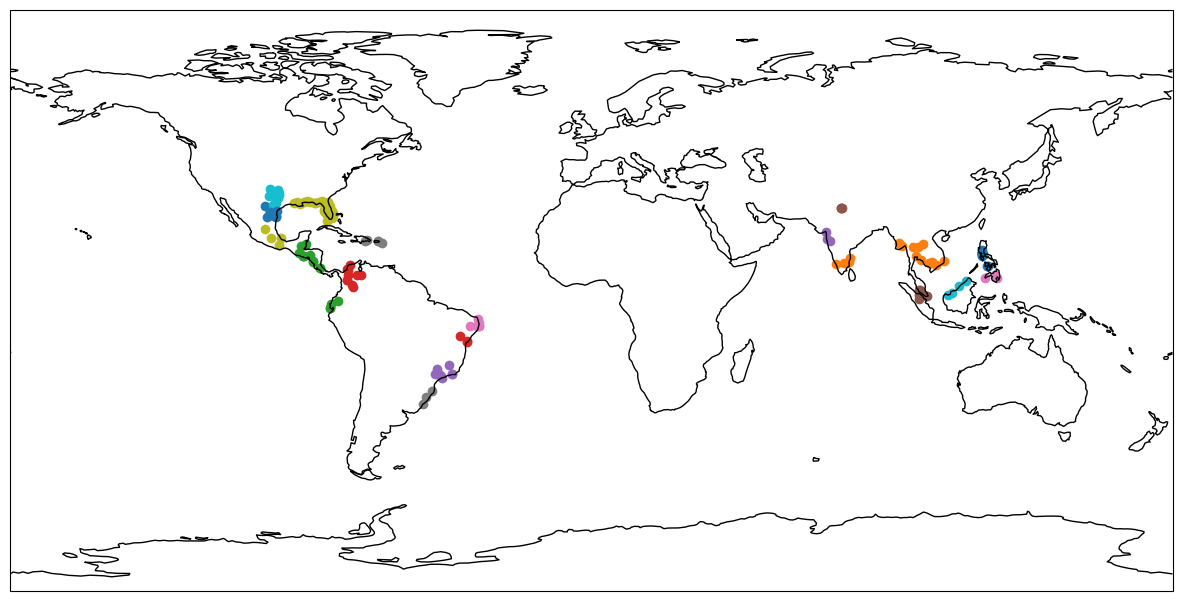

In [41]:
def count_zika_mentions(headlines):
    zika_regex = re.compile(r'\bzika\b',
                          flags=re.IGNORECASE)
    zika_count = 0
    for headline in headlines:
        if zika_regex.search(headline):
            zika_count += 1
    return zika_count

fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection=PlateCarree())

for _, group in sorted_groups + us_sorted_groups:
    headlines = group.Headline.values
    zika_count = count_zika_mentions(headlines)
    if float(zika_count) / len(headlines) > 0.5:
        ax.scatter(group.Longitude, group.Latitude)

ax.coastlines()
ax.set_global()
plt.show()